https://github.com/pycaret/pycaret/blob/master/examples/Pycaret_2.1_Regression_EmployeePerformance.ipynb

In [145]:
import numpy as np
import pandas as pd
import warnings
import time
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])
from sklearn import set_config
set_config(display='text')

In [146]:
# Load Dataset.
dataset = pd.read_csv('employee_performance.csv')
from pycaret.regression import *

In [147]:
dataset = dataset.iloc[:, :10]

## Data Pre-processing

In [148]:
drop_cols = ['Agent_ID']

In [149]:
# Drop Agent_ID from correlation dataset.
for col in drop_cols:
    dataset = dataset.drop([col], axis=1)

In [150]:
# Check shape of dataset and view first few observations to ensure data loaded correctly.
print("Shape of dataset (observations, features):", dataset.shape)
dataset.head(5).round(2)

Shape of dataset (observations, features): (102, 9)


,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Site,Function_Field
0,100.00,90.00,90.00,96.15,100.00,96.88,100.00,Kuala Lumpur,Agent
1,94.00,100.00,96.87,96.87,96.10,95.89,98.33,Kuala Lumpur,Agent
2,94.44,80.00,92.94,92.94,100.00,93.94,96.30,Kuala Lumpur,Agent
3,100.00,95.00,96.63,96.63,92.50,95.65,100.00,Kuala Lumpur,Agent
4,96.88,95.83,94.28,94.28,83.33,95.35,100.00,Kuala Lumpur,Agent


In [151]:
dataset.describe().round(2)

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,95.65,94.10,95.55,95.19,94.91,94.97,96.54
std,4.36,10.47,3.56,3.94,5.45,4.68,3.83
min,77.78,0.00,80.56,80.00,75.00,80.00,83.33
25%,93.75,92.45,93.87,93.28,92.31,92.94,95.00
50%,96.15,94.94,95.83,96.01,96.00,95.86,97.33
75%,100.00,100.00,97.56,97.57,100.00,98.15,100.00
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [152]:
def create_corr_plot(dataset):
    # Create a correlation for the dataset.
    dataset_corr = dataset.corr().round(4)

    # Create a correlation matrix. Only bottom left corner valued. 
    mask = np.zeros_like(dataset_corr.round(4))
    mask[np.triu_indices_from(mask)] = True

    # Generate the corrleation matrix (heatmap) using Seaborn. 
    with sns.axes_style("whitegrid"):
        f, ax = plt.subplots(figsize=(12, 10))
        ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.1f')
        plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Features', fontsize=15)
    plt.show()

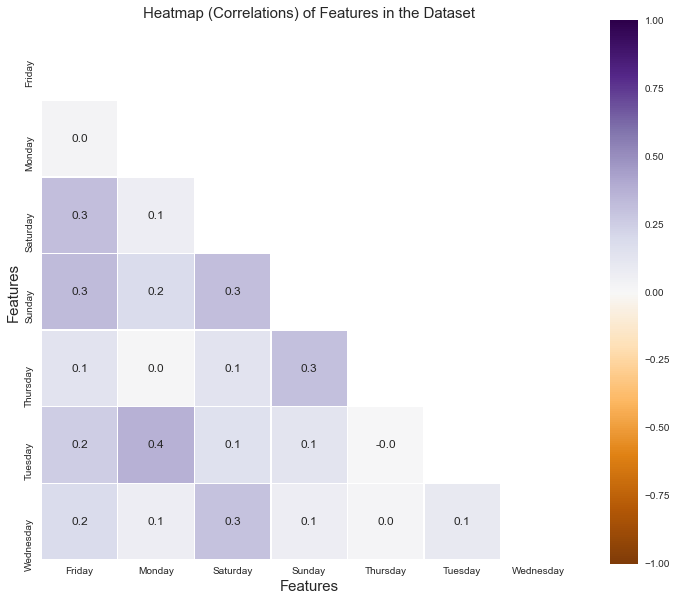

In [153]:
create_corr_plot(dataset)

In [154]:
dataset.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Site,Function_Field
0,100.000000,90.000000,90.000000,96.145833,100.000000,96.875000,100.000000,Kuala Lumpur,Agent
1,94.000000,100.000000,96.865528,96.865528,96.103896,95.890411,98.333333,Kuala Lumpur,Agent
2,94.444444,80.000000,92.936027,92.936027,100.000000,93.939394,96.296296,Kuala Lumpur,Agent
3,100.000000,95.000000,96.630435,96.630435,92.500000,95.652174,100.000000,Kuala Lumpur,Agent
4,96.875000,95.833333,94.278101,94.278101,83.333333,95.348837,100.000000,Kuala Lumpur,Agent


In [155]:
num_cols = dataset._get_numeric_data().columns
cat_cols = set(dataset.columns) - set(num_cols)

In [156]:
def box_plot(dataset, cat_cols):
    dataset1 = dataset.drop(cat_cols, axis=1)
    dataset_normal = (dataset1 - dataset1.mean())/dataset1.std()
    
    # Generate a boxplot using Seaborn. 
    dataset_boxplot = pd.DataFrame(data = dataset_normal, columns =dataset_normal.columns)
    plt.figure(figsize=(15,5))
    sns.boxplot(x="value", y="variable", data=pd.melt(dataset_boxplot), color='#cccccc')
    sns.swarmplot(x="value", y="variable", data=pd.melt(dataset_boxplot), alpha=0.5)
    plt.title('First Call Resolution by Days.', fontsize=12)
    plt.ylabel('Days', fontsize=12)
    plt.xlabel('FCR', fontsize=12)
    plt.show()

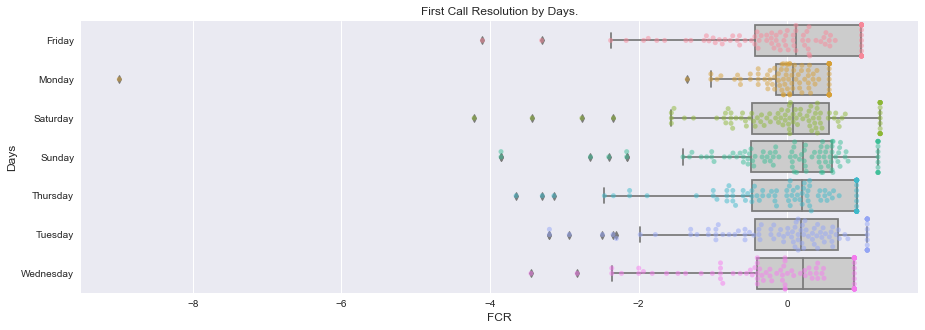

In [157]:
box_plot(dataset, cat_cols)